# Проект: Статистический анализ данных

**Описание исследования**

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

1. Без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей.

2. С подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- тоимость старта — бесплатно.

**Цель исследования**

Проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Ход исследования**

Мое исследование пройдет в шесть этапов:

- Загрузка данных;
- Предобработка данных;
- Исследовательский анализ данных;
- Объединение данных;
- Подсчёт выручки;
- Проверка гипотез.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

**1.1** *Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.*

In [2]:
users_df = pd.read_csv('/datasets/users_go.csv')
rides_df = pd.read_csv('/datasets/rides_go.csv')
subscriptions_df = pd.read_csv('/datasets/subscriptions_go.csv')

**1.2** *Выведем первые строки каждого набора данных.*

In [3]:
users_df.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
subscriptions_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**1.3** *Изучим общую информацию о каждом датафрейме.*

Датафрейм 'users_df'

In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
users_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [8]:
users_df.duplicated().sum()

31

Датафрейм 'rides_df'

In [9]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [10]:
rides_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [11]:
rides_df.duplicated().sum()

0

Датафрейм 'subscriptions_df'

In [12]:
subscriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [13]:
subscriptions_df.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [14]:
subscriptions_df.duplicated().sum()

0

**Вывод:**

- Датафрейм 'users_df': 1565 записи, пропусков нет, 31 явный дуликат;
- Датафрейм 'rides_df': 18068 записи, пропусков нет, явных дубликатов нет, некорректный тип данных для столбца 'date';
- Датафрейм 'subscriptions_df': 2 записи, пропусков нет, явных дубликатов нет;

---

#### Шаг 2. Предобработка данных

**2.1** *Предоработка users_df*

Удалим дубликаты

In [15]:
users_df = users_df.drop_duplicates().reset_index(drop=True)

In [16]:
print(f'Количество дубликатов в users_df: {users_df.duplicated().sum()}')

Количество дубликатов в users_df: 0


**2.2** *Предоработка rides_df*

In [17]:
rides_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Округлим значения в столбце 'distance' до сотых

In [18]:
rides_df['distance'] = rides_df['distance'].round(2)

Округлим значения в столбце 'duration' до целого с помощью метода "потолка" и приведем к соответствующему типу данных

In [19]:
rides_df['duration'] = np.ceil(rides_df['duration']).astype('int')

Приведем значения в столбце 'date' к типу даты pandas

In [20]:
rides_df['date'] = pd.to_datetime(rides_df['date'])

Создадим новый столбец с номером месяца на основе столбца 'date'

In [21]:
rides_df['month'] = rides_df['date'].dt.month

Проверка:

In [22]:
rides_df.head()

,user_id,distance,duration,date,month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


In [23]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  int64         
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 705.9 KB


**2.3** *Предоработка subscriptions_df*

Не требуется

**Вывод:**

В ходе проведения предобработки данных выполнено:
1. В датафрейме 'users_df':
- Удалены дубликаты.
2. В датафрейме 'rides_df':
- Округлены значения в столбце 'distance' до сотых;
- Округлены значения в столбце 'duration' до целого, приведены к типы данных 'int';
- Приведены значения в столбце 'date' к типу даты pandas;
- Создан новый столбец с номером месяца на основе столбца 'date'.
3. В датафрейме 'subscriptions_df' изменения не проводились

---

#### Шаг 3. Исследовательский анализ данных

*Опиcание и визуализация общей информации о пользователях и поездках:*

**3.1** Частота встречаемости городов.

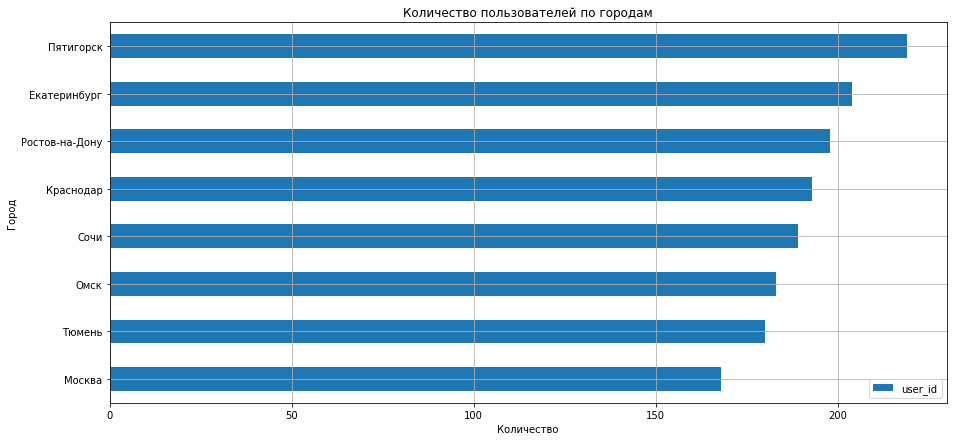

In [24]:
users_df.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True).plot(kind='barh', grid=True, figsize=(15, 7))
plt.title('Количество пользователей по городам')
plt.xlabel('Количество')
plt.ylabel('Город')
plt.show();

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

Количество пользователей по городам

In [25]:
users_df.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


**Вывод:**

Больше всего пользователей из Пятигорска и Екатеринбурга - больше 200,в Ростове-на-Дону, Краснодаре, Сочи, Омске, Тюмене - от 180 до 198. Самый низкий показатель в Москве.

**3.2** соотношение пользователей с подпиской и без подписки.

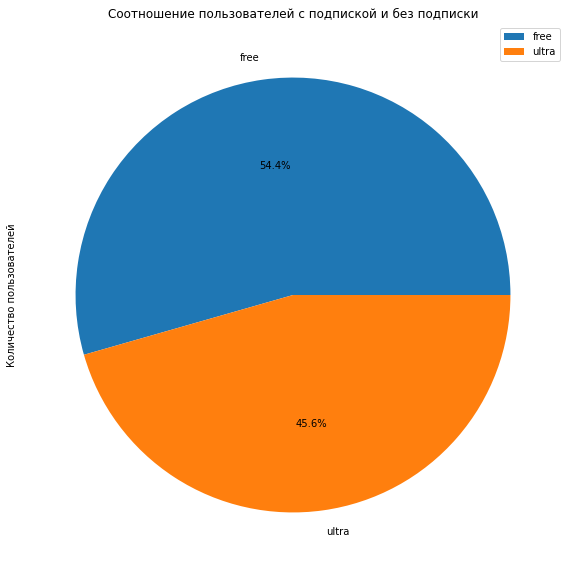

In [26]:
users_df.pivot_table(index='subscription_type', values='user_id', aggfunc='count').plot.pie(y='user_id', figsize=(10, 10), label='Количество пользователей', title = 'Соотношение пользователей с подпиской и без подписки', autopct = '%1.1f%%')
plt.show();

**Вывод:**

Пользователей без подписки (free) - 54.4%, пользователей с подпиской ultra - 45.6%.

**3.3** возраст пользователей.

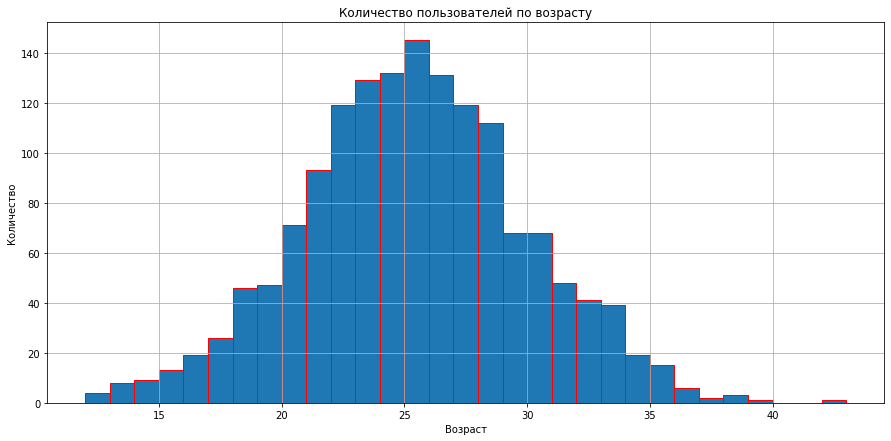

In [27]:
age_difference = users_df['age'].max() - users_df['age'].min()
users_df['age'].hist(bins=age_difference, figsize=(15, 7), edgecolor='red')
plt.title('Количество пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show();

Общая информация по возрасту пользователей

In [28]:
users_df['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Размах данных по возрасту

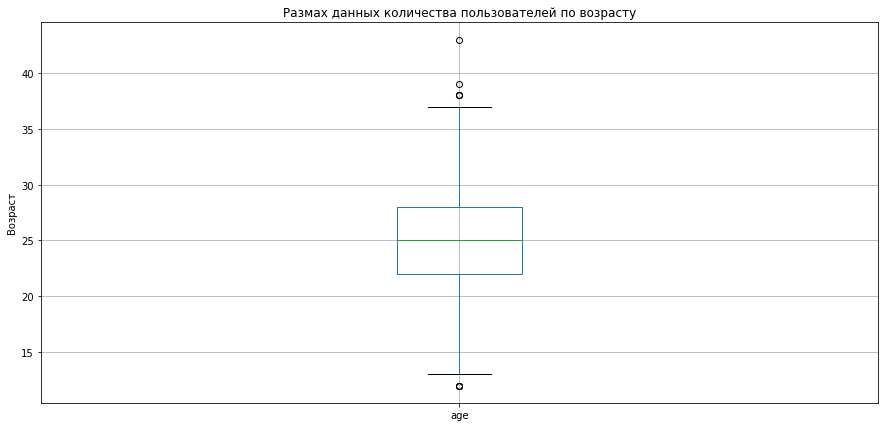

In [29]:
plt.figure(figsize=(15, 7))
users_df.boxplot('age')
plt.title('Размах данных количества пользователей по возрасту')
plt.ylabel('Возраст')
plt.show();

**Вывод:**

Медианный возраст пользователей - 25 лет, это значит, что половина моложе 25 лет и половина - старше. Межквартильный размах показывает, что 50% пользователей в возрасте от 22 до 28 лет. Также, есть аномальные значения - минимальный возраст клиентов составляет 12 лет.

**3.4** расстояние, которое пользователь преодолел за одну поездку.

In [30]:
rides_df['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

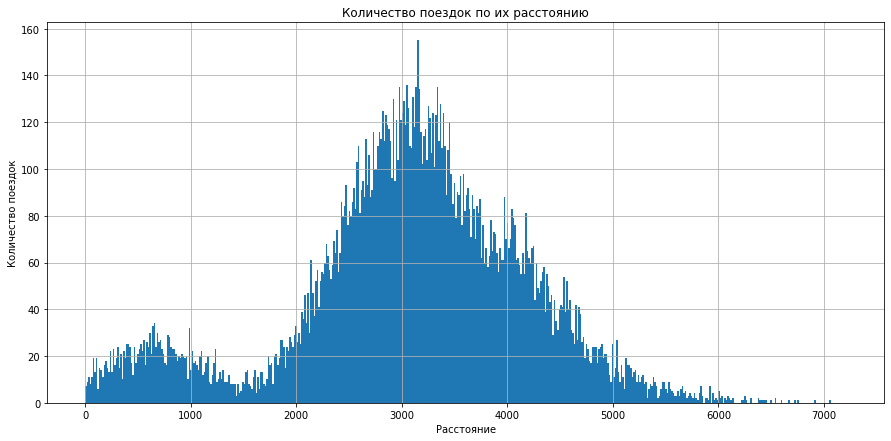

In [31]:
rides_df['distance'].hist(bins=500, figsize=(15, 7), range=(0, 7211))
plt.title('Количество поездок по их расстоянию')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show();

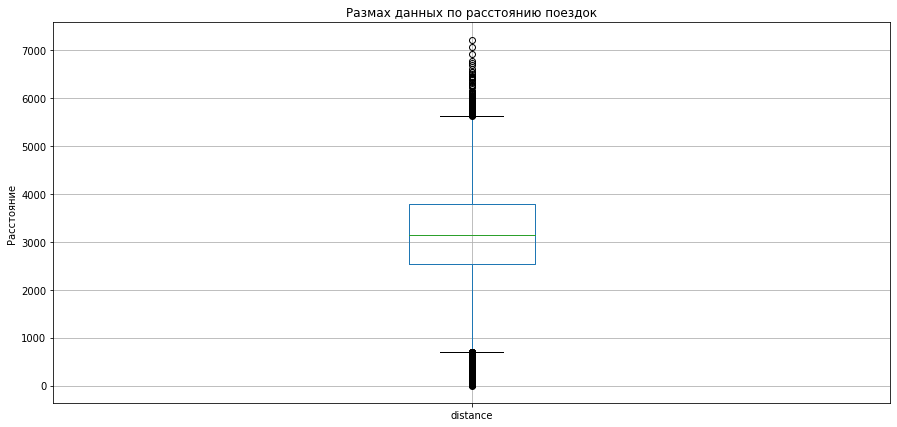

In [32]:
plt.figure(figsize=(15, 7))
rides_df.boxplot('distance')
plt.title('Размах данных по расстоянию поездок')
plt.ylabel('Расстояние')
plt.show();

**Вывод:**

По диаграмме размаха видно, что количество аномальных данных довольно большое. Среднее проезжаемое расстояние - 3070.65 метров, медианное - 3133.61 метра. Половина клиентов проезжают от 2543 до 3776 метров за одну поездку.
Удалять аномальные данные нельзя, потому что их слишком много (поездки до 800 метров и поездки свыше 5700 метров).

**3.5** продолжительность поездок.

In [33]:
rides_df['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

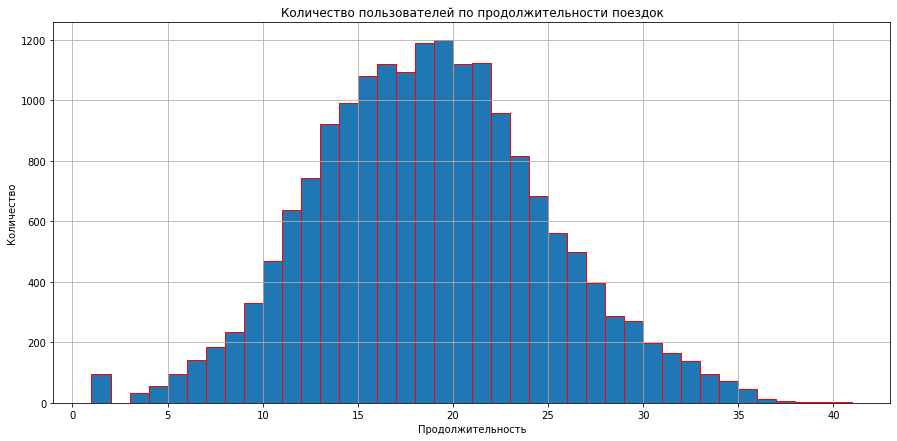

In [34]:
duration_difference = rides_df['duration'].max() - rides_df['duration'].min()
rides_df['duration'].hist(bins=duration_difference, figsize=(15, 7), edgecolor='red')
plt.title('Количество пользователей по продолжительности поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Количество')
plt.show();

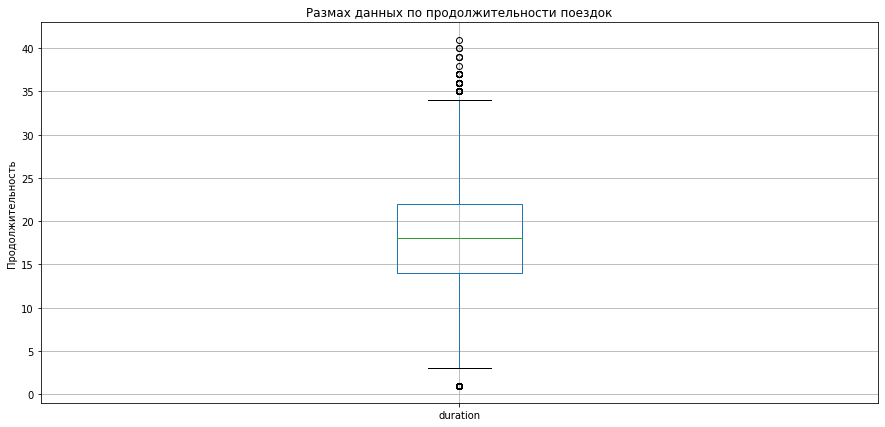

In [35]:
plt.figure(figsize=(15, 7))
rides_df.boxplot('duration')
plt.title('Размах данных по продолжительности поездок')
plt.ylabel('Продолжительность')
plt.show();

**Вывод:**

Самая короткая поездка составляет 1 минуту, самая долгая - 41 минуту. По диаграмме видно, что чаще всего поездки от 10 до 27 минут. Средняя продолжительность - 18.3 минуты, медианное - 18 метра. Половина клиентов пользуются самокатом от 14 до 22 минут за одну поездку. Аномальные значения: поездки до 3 минут и свыше 34. Аномальные значения так же не нужно удалять.

**ВЫВОД:**

В ходе исследовательского анализа данных, было выявлено:
- больше всего пользователей из Пятигорска и Екатеринбурга - больше 200,в Ростове-на-Дону, Краснодаре, Сочи, Омске, Тюмене - от 180 до 198. Самый низкий показатель в Москве;
- пользователей без подписки (free) - 54.4%, пользователей с подпиской ultra - 45.6%;
- медианный возраст пользователей - 25 лет, это значит, что половина моложе 25 лет и половина - старше. Межквартильный размах показывает, что 50% пользователей в возрасте от 22 до 28 лет. Также, есть аномальные значения - минимальный возраст клиентов составляет 12 лет.
- по диаграмме размаха видно, что количество аномальных данных довольно большое. Среднее проезжаемое расстояние - 3070.65 метров, медианное - 3133.61 метра. Половина клиентов проезжают от 2543 до 3776 метров за одну поездку. Удалять аномальные данные нельзя, потому что их слишком много (поездки до 800 метров и поездки свыше 5700 метров);
- самая короткая поездка составляет 1 минуту, самая долгая - 41 минуту. По диаграмме видно, что чаще всего поездки от 10 до 27 минут. Средняя продолжительность - 18.3 минуты, медианное - 18 метра. Половина клиентов пользуются самокатом от 14 до 22 минут за одну поездку. Аномальные значения: поездки до 3 минут и свыше 34. Аномальные значения так же не нужно удалять.

---

#### Шаг 4. Объединение данных

**4.1** Объединение данных о пользователях, поездках и подписках в один датафрейм.

In [36]:
main_df = pd.merge(users_df, rides_df, on='user_id')
main_df = pd.merge(main_df, subscriptions_df, on='subscription_type')

In [37]:
main_df.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,17,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,15,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,24,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,16,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,16,2021-11-22,11,6,0,199


In [38]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int64         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.8+ MB


Проверка на пустые значения в датафрейме

In [39]:
main_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверка на явные дубликаты в датафрейме

In [40]:
main_df.duplicated().sum()

0

**Вывод:**

Новый датафрейм, объединящий три изначальных датафрейма: users_df, rides_df, subscriptions_df, имеет 18068 строк - столько же, как и в датафрейме'rides_df', значит пустых значений и дубликатов нет, дополнительная проверка произведена.

**4.2** Создание ещё двух датафреймов из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [41]:
free_df = main_df[main_df['subscription_type'] == 'free']

In [42]:
free_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  int64         
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.1+ MB


In [43]:
free_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0


In [44]:
ultra_df = main_df[main_df['subscription_type'] == 'ultra']

In [45]:
ultra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   int64         
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 660.2+ KB


In [46]:
ultra_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


**Вывод:**

Созданы два новых датафрейма из общего датафрейма:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

**4.3** Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

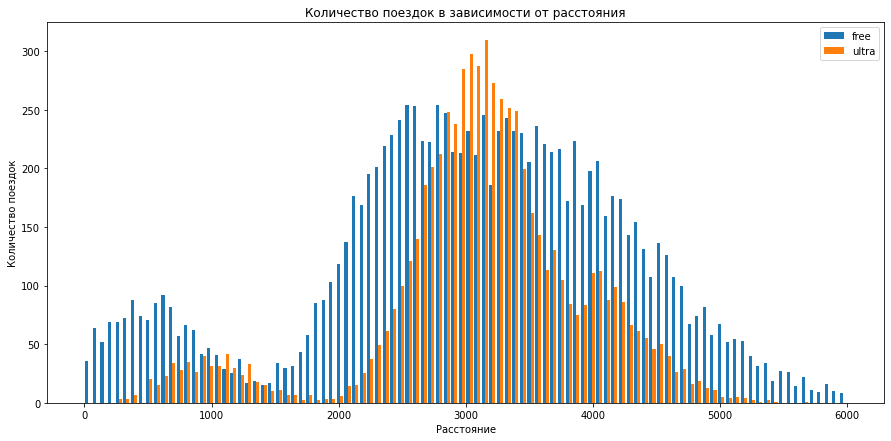

In [47]:
plt.figure(figsize=(15, 7))
plt.hist([free_df['distance'], ultra_df['distance']], bins=100, label=['free', 'ultra'], range=(0, 6000))
plt.title('Количество поездок в зависимости от расстояния')
plt.legend(loc='upper right')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show();

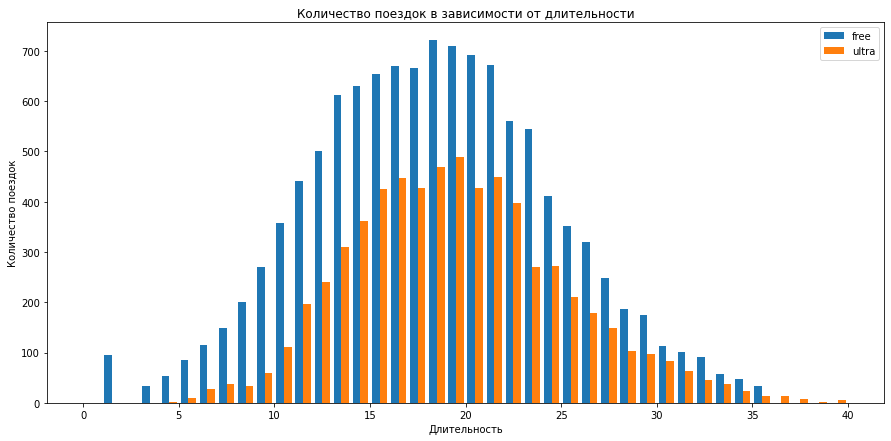

In [48]:
plt.figure(figsize=(15, 7))
plt.hist([free_df['duration'], ultra_df['duration']], bins=40, label=['free', 'ultra'], range=(0, 40))
plt.title('Количество поездок в зависимости от длительности')
plt.legend(loc='upper right')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.show();

In [49]:
free_df['distance'].describe(), ultra_df['distance'].describe()

(count    11568.000000
 mean      3045.495284
 std       1246.173810
 min          0.860000
 25%       2366.560000
 50%       3114.650000
 75%       3905.695000
 max       7211.010000
 Name: distance, dtype: float64,
 count    6500.000000
 mean     3115.445431
 std       836.895369
 min       244.210000
 25%      2785.447500
 50%      3148.640000
 75%      3560.577500
 max      5699.770000
 Name: distance, dtype: float64)

In [50]:
free_df['duration'].describe(), ultra_df['duration'].describe()

(count    11568.000000
 mean        17.890992
 std          6.330250
 min          1.000000
 25%         13.000000
 50%         18.000000
 75%         22.000000
 max         35.000000
 Name: duration, dtype: float64,
 count    6500.000000
 mean       19.037692
 std         5.577439
 min         4.000000
 25%        15.000000
 50%        19.000000
 75%        22.000000
 max        41.000000
 Name: duration, dtype: float64)

**Вывод:**

У пользователей без подписки есть аномально короткие по времени и расстоянию поездки.
Средние и медианные значения больше у пользователей с подпиской. По минимальным значения длительности и расстояния такая же зависимость.

**ВЫВОД:**

В ходе объединение данных, было сделано и выявлено:
- создан новый датафрейм, объединящий три изначальных датафрейма: users_df, rides_df, subscriptions_df, который имеет 18068, пустых значений и дубликатов нет;
- созданы еще два датафрейма из нового датафрейма: c данными о пользователях без подписки и с данными о пользователях с подпиской;
- Выявлена зависимость от наличия подписки: подписка влияет на расстояние и длительность поездок. У пользователей без подписки есть аномально короткие по времени и расстоянию поездки. Средние и медианные значения больше у пользователей с подпиской. По минимальным значения длительности и расстояния такая же зависимость.

---

#### Шаг 5. Подсчёт выручки

**5.1** 
- Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.
- Поиск суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц.

In [51]:
users_month_profit = main_df.pivot_table(
    index=['user_id', 'month'],
    values=['distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'],
    aggfunc={
        'distance': ['count', 'sum'],
        'duration': 'sum',
        'minute_price': 'mean',
        'start_ride_price': 'mean',
        'subscription_fee': 'mean',
        }
)

In [52]:
users_month_profit.columns = ['count', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee']

In [53]:
users_month_profit.head(10)

count  distance  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2   7027.51        42             6                 0   
        4          1    754.16         7             6                 0   
        8          2   6723.47        46             6                 0   
        10         2   5809.91        32             6                 0   
        11         3   7003.50        56             6                 0   
        12         2   6751.63        28             6                 0   
2       3          3  10187.73        63             6                 0   
        4          2   6164.39        40             6                 0   
        6          1   3255.34        14             6                 0   
        7          2   6780.73        48             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199

**Вывод:**

- Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4;
- Найдены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

**5.2**  Добавление в этот же датафрейм столбца с помесячной выручкой, которую принёс каждый пользователь.

In [54]:
# Помесячная выручка = стоимость старта поездки * количество поездок + стоимость одной минуты поездки * общая продолжительность всех поездок в минутах + стоимость подписки

In [55]:
users_month_profit['profit'] = (users_month_profit['start_ride_price']*users_month_profit['count']+users_month_profit['minute_price']*users_month_profit['duration']+users_month_profit['subscription_fee'])

In [56]:
users_month_profit.head(10)

count  distance  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2   7027.51        42             6                 0   
        4          1    754.16         7             6                 0   
        8          2   6723.47        46             6                 0   
        10         2   5809.91        32             6                 0   
        11         3   7003.50        56             6                 0   
        12         2   6751.63        28             6                 0   
2       3          3  10187.73        63             6                 0   
        4          2   6164.39        40             6                 0   
        6          1   3255.34        14             6                 0   
        7          2   6780.73        48             6                 0   

               subscription_fee  profit  
user_id month                            
1       1                   199     451  
        4                   199     241  
        8                   199     475  
        10                  199     391  
        11                  199     535  
        12                  199     367  
2       3                   199     577  
        4                   199     439  
        6                   199     283  
        7                   199     487

Выручка всего:

In [57]:
users_month_profit['profit'].sum()

3878641

**Вывод:**

Добавлен в этот же датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь.

**ВЫВОД:**
- создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4;
- найдены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;
- добавлен в этот же датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь.

Выручка сервиса составила 3 878 641 руб.

---

#### Шаг 6. Проверка гипотез

**6.1** Проверка гипотезы: Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Выдвинем гипотезы:

H0: Средние продолжительности поездок с подпиской и без равны

H1: Средняя продолжительность поездки с подпиской больше поездки без подписки

In [58]:
results = st.ttest_ind(
    ultra_df['duration'],
    free_df['duration'],
    equal_var=True,
    alternative='greater'
)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Вывод:**

Нулевая гипотеза отвергнута, при принятом пороге 5%, можно считать, что средняя продолжительность поездки с подпиской больше поездки без подписки

**6.2** Проверка гипотезы: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Выдвинем гипотезы:

H0: Среднее растояние поездок с подпиской равно 3130 метров

H1: Среднее растояние поездок с подпиской превышает 3130 метров

In [59]:
distance = 3130

results = st.ttest_1samp(
    ultra_df['distance'],
    distance,
    alternative='greater'
)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Не получилось отвергнуть нулевую гипотезу, при принятом пороге 5%, можно считать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального с точки зрения износа самоката расстояния - 3130 метров

**6.3** Проверка гипотезы о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Выдвинем гипотезы:

H0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки

H1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [60]:
results = st.ttest_ind(
    users_month_profit.loc[users_month_profit['subscription_fee'] > 0, 'profit'],
    users_month_profit.loc[users_month_profit['subscription_fee'] == 0, 'profit'],
    equal_var=True,
    alternative='greater'
)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:**

Нулевая гипотеза отвергнута, при принятом пороге 5%, можно считать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**6.4** Проверка гипотезы: Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

**Вывод:**

В данном случае лучше использовать scipy.stats.ttest_rel(), так как у нас парные (зависимые) выборки - количество обращений до и после обновления серверов для каждого пользователя. Этот тест проверяет, произошло ли статически значимое изменение среднего числа обращений, и обладает большей мощностью по сравнению с непараметрическими альтернативами при нормальном распределении данных.

**ВЫВОД:**

В ходе проверки гипотез, были сделаны следующие выводы:
- Нулевая гипотеза отвергнута, при принятом пороге 5%, можно считать, что средняя продолжительность поездки с подпиской больше поездки без подписки;
- Не получилось отвергнуть нулевую гипотезу, при принятом пороге 5%, можно считать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального с точки зрения износа самоката расстояния - 3130 метров;
- Нулевая гипотеза отвергнута, при принятом пороге 5%, можно считать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
- В данном случае лучше использовать scipy.stats.ttest_rel(), так как у нас парные (зависимые) выборки - количество обращений до и после обновления серверов для каждого пользователя. Этот тест проверяет, произошло ли статически значимое изменение среднего числа обращений, и обладает большей мощностью по сравнению с непараметрическими альтернативами при нормальном распределении данных.

---

#### Шаг 7. Распределения

---

**ВЫВОД:**

В ходе выполнения проекта "Статистический анализ данных", было выполнено и сделаны следующие выводы:

1. Загрузка данных
- Датафрейм 'users_df': 1565 записи, пропусков нет, 31 явный дуликат;
- Датафрейм 'rides_df': 18068 записи, пропусков нет, явных дубликатов нет, некорректный тип данных для столбца 'date';
- Датафрейм 'subscriptions_df': 2 записи, пропусков нет, явных дубликатов нет;

2. Предобработка данных
- В датафрейме 'users_df':
    - Удалены дубликаты.
- В датафрейме 'rides_df':
    - Округлены значения в столбце 'distance' до сотых;
    - Округлены значения в столбце 'duration' до целого, приведены к типы данных 'int';
    - Приведены значения в столбце 'date' к типу даты pandas;
    - Создан новый столбец с номером месяца на основе столбца 'date'.
- В датафрейме 'subscriptions_df' изменения не проводились

3. Исследовательский анализ данных
- Больше всего пользователей из Пятигорска и Екатеринбурга - больше 200,в Ростове-на-Дону, Краснодаре, Сочи, Омске, Тюмене - от 180 до 198. Самый низкий показатель в Москве.
- Пользователей без подписки (free) - 54.4%, пользователей с подпиской ultra - 45.6%.
- Медианный возраст пользователей - 25 лет, это значит, что половина моложе 25 лет и половина - старше. Межквартильный размах показывает, что 50% пользователей в возрасте от 22 до 28 лет. Также, есть аномальные значения - минимальный возраст клиентов составляет 12 лет.
- По диаграмме размаха видно, что количество аномальных данных довольно большое. Среднее проезжаемое расстояние - 3070.65 метров, медианное - 3133.61 метра. Половина клиентов проезжают от 2543 до 3776 метров за одну поездку. Удалять аномальные данные нельзя, потому что их слишком много (поездки до 800 метров и поездки свыше 5700 метров).
- Самая короткая поездка составляет 1 минуту, самая долгая - 41 минуту. По диаграмме видно, что чаще всего поездки от 10 до 27 минут. Средняя продолжительность - 18.3 минуты, медианное - 18 метра. Половина клиентов пользуются самокатом от 14 до 22 минут за одну поездку. Аномальные значения: поездки до 3 минут и свыше 34. Аномальные значения так же не нужно удалять.
	
4. Объединение данных
- Создан новый датафрейм, объединящий три изначальных датафрейма: users_df, rides_df, subscriptions_df, который имеет 18068, пустых значений и дубликатов нет.
-  Созданы еще два датафрейма из нового датафрейма: c данными о пользователях без подписки и с данными о пользователях с подпиской.
- Выявлена зависимость от наличия подписки: подписка влияет на расстояние и длительность поездок. У пользователей без подписки есть аномально короткие по времени и расстоянию поездки. Средние и медианные значения больше у пользователей с подпиской. По минимальным значения длительности и расстояния такая же зависимость.


5. Подсчёт выручки
- Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.
- Найдены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Добавлен в этот же датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь.
- Выручка сервиса составила 3 878 641 руб.


6. Проверка гипотез
- Нулевая гипотеза отвергнута, при принятом пороге 5%, можно считать, что средняя продолжительность поездки с подпиской больше поездки без подписки.
- Не получилось отвергнуть нулевую гипотезу, при принятом пороге 5%, можно считать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального с точки зрения износа самоката расстояния - 3130 метров.
- Нулевая гипотеза отвергнута, при принятом пороге 5%, можно считать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
- В данном случае лучше использовать scipy.stats.ttest_rel(), так как у нас парные (зависимые) выборки - количество обращений до и после обновления серверов для каждого пользователя. Этот тест проверяет, произошло ли статически значимое изменение среднего числа обращений, и обладает большей мощностью по сравнению с непараметрическими альтернативами при нормальном распределении данных.



